## Final Project Submission

Please fill out:
* Student name: Leticia D Fernandes
* Student pace: part time
* Scheduled project review date/time: Tue, Sep 14, 2021, 8:00 AM - 8:45 AM Mountain time (GMT-6:00)
* Instructor name: Abhineet
* Blog post URL: https://callableleticia.blog/2021/09/12/phase-2-project/
* GitHub Repo: https://github.com/lddrasler/phase-2-project

In [82]:
import sqlite3
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

In [83]:
data = pd.read_csv('data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [84]:
data=data.drop(['sqft_living15','sqft_basement','sqft_lot15','sqft_above'],axis=1)

In [85]:
data['waterfront'].head(10)

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: waterfront, dtype: float64

In [86]:
import folium
water_front = data[data.waterfront==1]
points = zip(water_front.lat,water_front.long)

lat = water_front.lat.mean()
long = water_front.long.mean()
base_map = folium.Map([lat, long], zoom_start=11)
for p in points:
    lat = p[0]
    long = p[1]
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
base_map

In [87]:
data['waterfront']=data['waterfront'].fillna(0)
data['waterfront'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: waterfront, dtype: float64

In [88]:
data['yr_renovated'].head(10)

0       0.0
1    1991.0
2       NaN
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
Name: yr_renovated, dtype: float64

In [89]:
data['yr_renovated']=data['yr_renovated'].fillna(0)
data['yr_renovated'].head(10)

0       0.0
1    1991.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
Name: yr_renovated, dtype: float64

In [90]:
data.yr_renovated
ren_selection = data.yr_renovated>=2000
data.yr_renovated[ren_selection]=1.0
data.yr_renovated[~ren_selection]=0.0
data = data.rename(columns={'yr_renovated':'is_renovated'})

In [91]:
data.duplicated(subset=['id']).sum()

177

In [92]:
data = data.sort_values(by=['date']).reset_index()
data=data.drop('index',axis=1)
data = data.drop_duplicates(subset=['id'],keep='last')
data.duplicated(subset=['id']).sum()

0

In [93]:
data=data.dropna()

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21357 non-null  int64  
 1   date          21357 non-null  object 
 2   price         21357 non-null  float64
 3   bedrooms      21357 non-null  int64  
 4   bathrooms     21357 non-null  float64
 5   sqft_living   21357 non-null  int64  
 6   sqft_lot      21357 non-null  int64  
 7   floors        21357 non-null  float64
 8   waterfront    21357 non-null  float64
 9   view          21357 non-null  float64
 10  condition     21357 non-null  int64  
 11  grade         21357 non-null  int64  
 12  yr_built      21357 non-null  int64  
 13  is_renovated  21357 non-null  float64
 14  zipcode       21357 non-null  int64  
 15  lat           21357 non-null  float64
 16  long          21357 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2.9+ MB


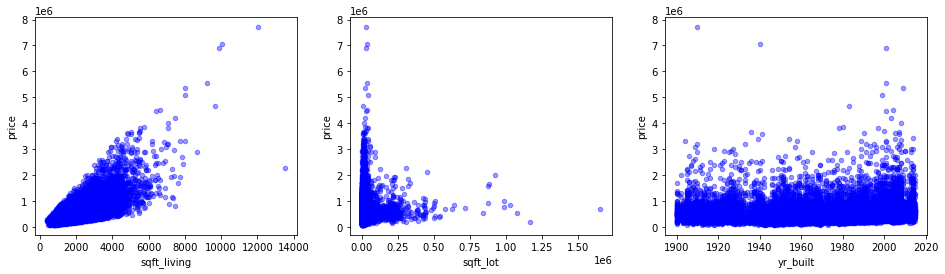

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,4))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

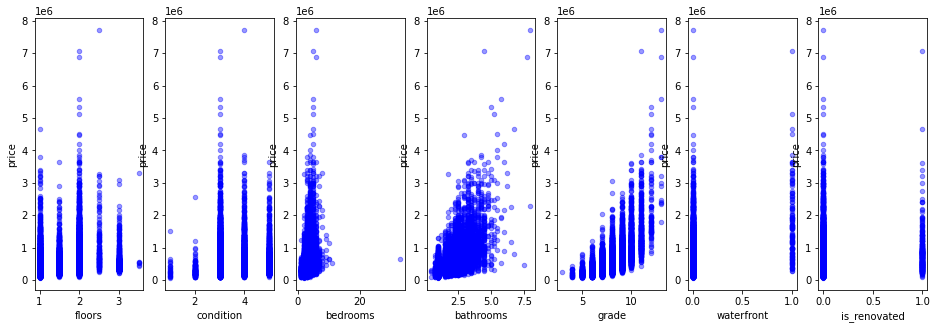

In [96]:
fig, axes = plt.subplots(nrows=1,ncols=7, figsize=(16,5))

for xcol, ax in zip(['floors', 'condition', 'bedrooms', 'bathrooms',
                     'grade','waterfront','is_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
#plotting the independent variable against our categorical predictors.
#I notice that there is an outlier in terms of bedrooms and exclude any house listed with more than 
#20 bedrooms.
# We notice that bedrooms, bathrooms, and grade appear to be correlated nicely wiht price. It looks like floors and condition are not.
#the waterfront and yr_renovated are not conclucisve from this visualization


In [97]:
data = data.drop(data[data.bedrooms>=10].index)
data = data[(np.abs(stats.zscore(data.price)) < 3)] 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20951 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20951 non-null  int64  
 1   date          20951 non-null  object 
 2   price         20951 non-null  float64
 3   bedrooms      20951 non-null  int64  
 4   bathrooms     20951 non-null  float64
 5   sqft_living   20951 non-null  int64  
 6   sqft_lot      20951 non-null  int64  
 7   floors        20951 non-null  float64
 8   waterfront    20951 non-null  float64
 9   view          20951 non-null  float64
 10  condition     20951 non-null  int64  
 11  grade         20951 non-null  int64  
 12  yr_built      20951 non-null  int64  
 13  is_renovated  20951 non-null  float64
 14  zipcode       20951 non-null  int64  
 15  lat           20951 non-null  float64
 16  long          20951 non-null  float64
dtypes: float64(8), int64(8), object(1)
memory usage: 2.9+ MB


In [99]:
date_temp=pd.DataFrame({
    'yr_sold':pd.to_datetime(data.date).dt.year,
    'is_renovated':data.is_renovated,'yr_built':data.yr_built})
date_temp
data['inner_age']=np.where(date_temp.is_renovated==0,(
    date_temp.yr_sold-date_temp.yr_built),(
    date_temp.is_renovated-date_temp.yr_built))

In [100]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,is_renovated,zipcode,lat,long,inner_age
0,5437600140,1/10/2015,325000.0,4,2.5,2240,5105,2.0,0.0,0.0,4,8,2002,0.0,98042,47.3922,-122.165,13.0
1,2215450100,1/12/2015,330000.0,4,2.5,2240,7589,2.0,0.0,0.0,3,8,1994,0.0,98030,47.3824,-122.207,21.0
2,4322300340,1/12/2015,265000.0,4,1.5,1740,12728,1.0,0.0,0.0,4,7,1964,0.0,98003,47.2808,-122.300,51.0
3,2523039310,1/12/2015,359000.0,4,2.5,1820,11325,1.0,0.0,0.0,3,8,1976,0.0,98166,47.4574,-122.361,39.0
4,3816300105,1/12/2015,435000.0,4,2.5,2060,10125,2.0,0.0,0.0,4,7,1979,0.0,98028,47.7640,-122.262,36.0


In [101]:
date_df=pd.to_datetime(data.date).dt.weekofyear
selection = date_df.between(20,32,inclusive=True)

date_df[selection]=1.0
date_df[~selection]=0.0

data['is_summer']=date_df

data=data.drop('date',axis=1)

<AxesSubplot:>

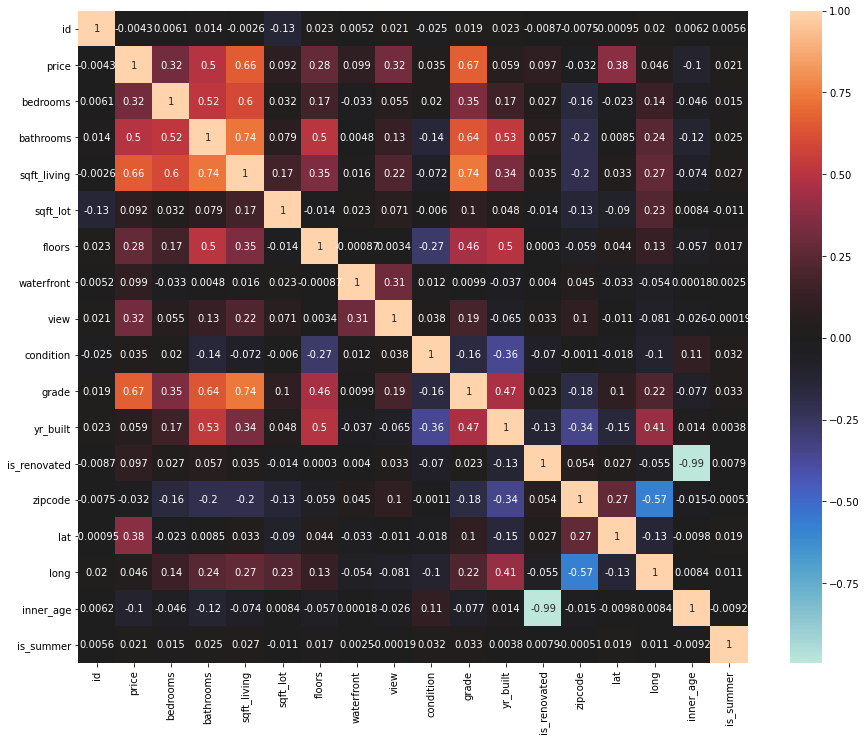

In [102]:
plt.figure(figsize=(15,12))
sns.heatmap(data=data.corr(), center=0, annot=True)

In [103]:
#We define our categorical data
categoricals =['bedrooms','floors','waterfront','condition','grade']

#unsufficient data to train our model obove this value, we will drop those houses
data = data.drop(data[data['bedrooms']>6].index)


#there are not many houses with a grade below 5 and above 12. We will restrict our analysis
#to houses wiht grades between these values
data = data[(data.grade>=5) & (data.grade<=12)]

data=data.reset_index(drop=True)

#The grade values are most commonly in the ranges 5-7, 7-9,9-12
#These data will be bineed into these three ranges
data['grade_bins']=pd.cut(data.grade, bins=(5,6,7,9,12),labels=(
    'dropped','fair','good','excellent'))

#data['grade_sq']=np.square(data.grade)
#data['bed_sq']=np.square(data.bedrooms)
data['yr_bins']=pd.cut(data.yr_built, bins=(1900,2000,2015),labels=(
    'dropped','new'))

bed_dummies = pd.get_dummies(data.bedrooms,prefix='beds',drop_first=True)
grade_dummies = pd.get_dummies(data.grade_bins,prefix='grade',drop_first=True)
yr_dummies = pd.get_dummies(data.yr_bins,prefix='age',drop_first=True)



In [104]:
zip_data=data[['zipcode','price']].groupby('zipcode').agg([
    'median'])['price']['median'].reset_index().sort_values(
    'median').reset_index(drop=True)

bin1=set(zip_data.zipcode.iloc[0:10].values)
bin2=set(zip_data.zipcode.iloc[10:20].values)
bin3=set(zip_data.zipcode.iloc[20:30].values)
bin4=set(zip_data.zipcode.iloc[30:40].values)
bin5=set(zip_data.zipcode.iloc[40:50].values)
bin6=set(zip_data.zipcode.iloc[50:60].values)
bin7=set(zip_data.zipcode.iloc[60:61].values)
bin8=set(zip_data.zipcode.iloc[61:62].values)
bin9=set(zip_data.zipcode.iloc[63:64].values)
bin10=set(zip_data.zipcode.iloc[64:65].values)
bin11=set(zip_data.zipcode.iloc[65:66].values)
bin12=set(zip_data.zipcode.iloc[66:67].values)
bin13=set(zip_data.zipcode.iloc[67:68].values)
bin14=set(zip_data.zipcode.iloc[68:69].values)

In [105]:
zip_dict={}
for i_,code in enumerate(data.zipcode):
    if code in bin1:
        zip_dict[i_]='bin1'
    elif code in bin2:
        zip_dict[i_]='bin2'
    elif code in bin3:
        zip_dict[i_]='bin3'
    elif code in bin4:
        zip_dict[i_]='bin4'
    elif code in bin5:
        zip_dict[i_]='bin5'
    elif code in bin6:
        zip_dict[i_]='bin6'
    elif code in bin7:
        zip_dict[i_]='bin7'
    elif code in bin8:
        zip_dict[i_]='bin8'
    elif code in bin9:
        zip_dict[i_]='bin9'
    elif code in bin10:
        zip_dict[i_]='bin10'
    elif code in bin11:
        zip_dict[i_]='bin11'
    elif code in bin12:
        zip_dict[i_]='bin12'
    elif code in bin13:
        zip_dict[i_]='bin13'
    else:
        zip_dict[i_]='bin14'

In [106]:
zip_df=pd.DataFrame.from_dict(zip_dict,orient='index',columns=['zip_bins'])

In [107]:
zip_dummies=pd.get_dummies(zip_df.zip_bins,prefix='zip',drop_first=True)

In [108]:
preprocessed = pd.concat([data,bed_dummies, grade_dummies,
                          yr_dummies, zip_dummies], axis=1).drop([
    'grade_bins','yr_bins','bedrooms','id','grade','yr_built',
    'zipcode','lat','long'],axis=1)

In [109]:
preprocessed.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'is_renovated', 'inner_age', 'is_summer', 'beds_2',
       'beds_3', 'beds_4', 'beds_5', 'beds_6', 'grade_fair', 'grade_good',
       'grade_excellent', 'age_new', 'zip_bin10', 'zip_bin11', 'zip_bin12',
       'zip_bin13', 'zip_bin14', 'zip_bin2', 'zip_bin3', 'zip_bin4',
       'zip_bin5', 'zip_bin6', 'zip_bin7', 'zip_bin8', 'zip_bin9'],
      dtype='object')

In [124]:
#Making a figure
# pd.concat([data,zip_df])['price','zip_bins']
fig_data1=pd.concat([data,zip_df],axis=1)[['price','zip_bins']].groupby('zip_bins').agg(['mean']).droplevel(axis=1,level=1).reset_index().sort_values('price').reset_index(drop=True)
fig_data1['relative_price']=fig_data1['price']/fig_data1['price'].iloc[0]
fig_data1

,zip_bins,price,relative_price
0,bin1,2.802131e+05,1.000000
1,bin2,3.317116e+05,1.183783
2,bin3,4.096829e+05,1.462040
3,bin4,4.938787e+05,1.762511
4,bin5,5.826837e+05,2.079430
5,bin6,6.592150e+05,2.352549
6,bin7,7.650958e+05,2.730407
7,bin9,7.676783e+05,2.739623
8,bin11,7.784581e+05,2.778093
9,bin10,7.790585e+05,2.780236


In [62]:
preprocessed['log_price']=np.log(preprocessed.price)

In [125]:
formula

'log_price~bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+is_renovated+inner_age+is_summer+beds_2+beds_3+beds_4+beds_5+beds_6+grade_fair+grade_good+grade_excellent+age_new+zip_bin10+zip_bin11+zip_bin12+zip_bin13+zip_bin14+zip_bin2+zip_bin3+zip_bin4+zip_bin5+zip_bin6+zip_bin7+zip_bin8+zip_bin9'

In [63]:
preprocessed_train=preprocessed.drop(data.sample(frac=0.3,random_state=1).index)
preprocessed_test =preprocessed.sample(frac=0.3,random_state=1)
preprocessed

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,is_renovated,inner_age,...,zip_bin14,zip_bin2,zip_bin3,zip_bin4,zip_bin5,zip_bin6,zip_bin7,zip_bin8,zip_bin9,log_price
0,325000.0,2.50,2240,5105,2.0,0.0,0.0,4,0.0,13.0,...,0,1,0,0,0,0,0,0,0,12.691580
1,330000.0,2.50,2240,7589,2.0,0.0,0.0,3,0.0,21.0,...,0,1,0,0,0,0,0,0,0,12.706848
2,265000.0,1.50,1740,12728,1.0,0.0,0.0,4,0.0,51.0,...,0,0,0,0,0,0,0,0,0,12.487485
3,359000.0,2.50,1820,11325,1.0,0.0,0.0,3,0.0,39.0,...,0,0,1,0,0,0,0,0,0,12.791078
4,435000.0,2.50,2060,10125,2.0,0.0,0.0,4,0.0,36.0,...,0,0,0,1,0,0,0,0,0,12.983101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20871,550000.0,1.50,1730,5750,1.0,0.0,0.0,3,0.0,67.0,...,0,0,0,0,1,0,0,0,0,13.217674
20872,975000.0,2.50,2720,11049,2.0,0.0,0.0,3,0.0,25.0,...,1,0,0,0,0,0,0,0,0,13.790193
20873,520000.0,1.75,1340,1368,2.0,0.0,0.0,3,0.0,8.0,...,0,0,0,0,1,0,0,0,0,13.161584
20874,344950.0,1.75,1870,7500,1.0,0.0,0.0,5,0.0,36.0,...,0,1,0,0,0,0,0,0,0,12.751155


In [64]:
predictors=preprocessed.drop(['price','log_price'],axis=1).columns

outcome = 'log_price'
formula = outcome + '~' + '+'.join(predictors)

model = ols(formula=formula, data=preprocessed_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2157.
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        16:58:57   Log-Likelihood:                 2715.0
No. Observations:               14613   AIC:                            -5364.
Df Residuals:                   14580   BIC:                            -5114.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.5185      0.022    526.294      0.000      11.476      11.561
bathrooms           0.0419      0.004     10.421      0.000       0.034       0.050
sqft_living         0.0002   3.85e-06     55.904      0.000       0.000       0.000
sqft_lot         3.063e-07   4.23e-08      7.243      0.000    2.23e-07    3.89e-07
floors              0.0125      0.004      2.990      0.003       0.004       0.021
waterfront          0.3712      0.029     12.729      0.000       0.314       0.428
view                0.0692      0.003     26.368      0.000       0.064       0.074
condition           0.0390      0.003     13.626      0.000       0.033       0.045
is_renovated        5.4664      0.190     28.777      0.000       5.094       5.839
inner_age           0.0027   9.54e-05     28.037      0.000       0.002       0.003
is_summer          -0.0200      0.004     -5.472      0.000      -0.027      -0.013
beds_2              0.0449      0.018      2.464      0.014       0.009       0.081
beds_3              0.0509      0.018      2.805      0.005       0.015       0.087
beds_4              0.0539      0.019      2.904      0.004       0.018       0.090
beds_5              0.0208      0.020      1.056      0.291      -0.018       0.059
beds_6             -0.0413      0.025     -1.676      0.094      -0.090       0.007
grade_fair          0.1508      0.006     23.652      0.000       0.138       0.163
grade_good          0.2882      0.008     37.299      0.000       0.273       0.303
grade_excellent     0.4234      0.012     35.146      0.000       0.400       0.447
age_new             0.0718      0.006     12.265      0.000       0.060       0.083
zip_bin10           0.6394      0.013     50.485      0.000       0.615       0.664
zip_bin11           0.7529      0.020     37.655      0.000       0.714       0.792
zip_bin12           0.9024      0.017     52.999      0.000       0.869       0.936
zip_bin13           0.8728      0.017     52.727      0.000       0.840       0.905
zip_bin14           0.9657      0.013     74.518      0.000       0.940       0.991
zip_bin2            0.1256      0.006     19.553      0.000       0.113       0.138
zip_bin3            0.3433      0.007     51.843      0.000       0.330       0.356
zip_bin4            0.4596      0.007     68.039      0.000       0.446       0.473
zip_bin5            0.6153      0.007     89.838      0.000       0.602       0.629
zip_bin6            0.6526      0.007     99.389      0.000       0.640       0.665
zip_bin7            0.8123      0.026     31.705      0.000       0.762       0.862
zip_bin8            0.8403      0.024     35.510      0.000       0.794       0.887
zip_bin9            0.6088      0.014     42.947      0.000       0.581       0.637
===========================================================

In [65]:
fypred = model.predict(preprocessed.drop(['price','log_price'],axis=1))
np.exp(fypred)
np.exp(preprocessed.log_price)

0        325000.0
1        330000.0
2        265000.0
3        359000.0
4        435000.0
           ...   
20871    550000.0
20872    975000.0
20873    520000.0
20874    344950.0
20875    295000.0
Name: log_price, Length: 20876, dtype: float64

In [66]:
import scipy.stats as stats

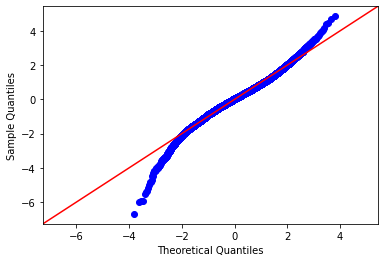

In [70]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [71]:
X=preprocessed_train.drop(['price','log_price'],axis=1)
y=preprocessed_train['price']
y_=preprocessed_train['log_price']

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed.drop(['price','log_price'],axis=1),
    preprocessed.log_price, test_size=0.3, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [74]:
linreg.score(X_train, y_train)

0.8240546447395394

In [75]:
X_train.columns

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'is_renovated', 'inner_age', 'is_summer', 'beds_2',
       'beds_3', 'beds_4', 'beds_5', 'beds_6', 'grade_fair', 'grade_good',
       'grade_excellent', 'age_new', 'zip_bin10', 'zip_bin11', 'zip_bin12',
       'zip_bin13', 'zip_bin14', 'zip_bin2', 'zip_bin3', 'zip_bin4',
       'zip_bin5', 'zip_bin6', 'zip_bin7', 'zip_bin8', 'zip_bin9'],
      dtype='object')

In [77]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train),squared=False)
test_mse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test),squared=False)
train_mse,test_mse

(117768.7399006887, 117182.99680894843)